# Pratical Machine Learning Project Report

by Ferreira, D. F. S.

### Introduction

Using devices such as Jawbone Up, Nike FuelBand, and Fitbit it is now possible to collect a large amount of data about personal activity relatively inexpensively. These type of devices are part of the quantified self movement – a group of enthusiasts who take measurements about themselves regularly to improve their health, to find patterns in their behavior, or because they are tech geeks. One thing that people regularly do is quantify how much of a particular activity they do, but they rarely quantify how well they do it.

In this project, we will use data from accelerometers on the belt, forearm, arm, and dumbell of 6 participants to predict the manner in which they did the exercise.

### Installing Necessary Packages

1. **rpart.plot:**
   - **Purpose:** The "rpart.plot" package in R is designed to enhance the visualization of decision trees created using the "rpart" package. It provides additional plotting functionalities, allowing users to create more informative and visually appealing tree diagrams.

2. **corrplot:**
   - **Purpose:** The "corrplot" package is used for visualizing correlation matrices in R. It offers a variety of graphical representations to help users understand and interpret the relationships between variables in a dataset. This package is particularly useful for exploring and analyzing the correlation structure of multivariate data.

3. **randomForest:**
   - **Purpose:** The "randomForest" package in R implements the random forest algorithm, a popular ensemble learning method. Random forests are used for both classification and regression tasks. This package is known for its ability to handle complex data and


In [2]:
install.packages("rpart.plot")
install.packages("corrplot")
install.packages("randomForest")

Installing package into ‘/home/denner/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

Installing package into ‘/home/denner/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

Installing package into ‘/home/denner/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)



### Importing Libraries

In [3]:
# Existing libraries
library(caret)
library(rpart)

# Recently installed
library(corrplot)
library(rpart.plot)
library(randomForest)

Carregando pacotes exigidos: ggplot2

Carregando pacotes exigidos: lattice

corrplot 0.92 loaded

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




### Downloading information

Downloading training and test data

In [4]:
trainUrl <-"https://d396qusza40orc.cloudfront.net/predmachlearn/pml-training.csv"
testUrl <- "https://d396qusza40orc.cloudfront.net/predmachlearn/pml-testing.csv"
trainFile <- "./dt/pml-training.csv"
testFile  <- "./dt/pml-testing.csv"

In [5]:
if (!file.exists("./dt")) {
  dir.create("./dt")
}
if (!file.exists(trainFile)) {
  download.file(trainUrl, destfile=trainFile, method="curl")
}
if (!file.exists(testFile)) {
  download.file(testUrl, destfile=testFile, method="curl")
}

### Read the Data Files in Raw

In [6]:
# Read the Data
trainRaw <- read.csv("./dt/pml-training.csv")
testRaw <- read.csv("./dt/pml-testing.csv")

In [7]:
# The 'dim' function in R returns a numeric vector of length 2 representing the number of rows and columns of the specified data frame.

In [8]:
# The dimensions of train Dataframe
dim(trainRaw)

[1] 19622   160

In [9]:
# The dimensions of test Dataframe
dim(testRaw)

[1]  20 160

# Cleanning Data - Train and Test Data

In [10]:
sum(complete.cases(trainRaw))

[1] 406

Therefore, sum(complete.cases(trainRaw)) gives the total rows in the trainRaw dataframe that do not contain missing values. This information is useful for evaluating the amount of complete data available in the training set.

In [11]:
trainRaw <- trainRaw[, colSums(is.na(trainRaw)) == 0]
testRaw <- testRaw[, colSums(is.na(testRaw)) == 0]

In short, these commands remove columns that have at least one missing value in the trainRaw and testRaw dataframes, keeping only the complete columns. This is useful to ensure that the datasets used in models do not contain variables with missing data.

In [12]:
# Creates a new class variable containing the values of the class column in the trainRaw dataframe.
classe <- trainRaw$classe

# trainRemove <- grepl("^X|timestamp|window", names(trainRaw)): Creates a logical vector indicating columns to be removed in the trainRaw dataframe. Columns whose names begin with "X", "timestamp", or "window" will be marked for removal.
trainRemove <- grepl("^X|timestamp|window", names(trainRaw))

# trainRaw <- trainRaw[, !trainRemove]: Removes columns marked for removal in the trainRaw dataframe.
trainRaw <- trainRaw[, !trainRemove]

# trainCleaned <- trainRaw[, sapply(trainRaw, is.numeric)]: Creates a new trainCleaned dataframe containing only the numeric columns from the trainRaw dataframe.
trainCleaned <- trainRaw[, sapply(trainRaw, is.numeric)]

# trainCleaned$class <- class: Adds the class variable back to the trainCleaned dataframe.
trainCleaned$classe <- classe

# testRemove <- grepl("^X|timestamp|window", names(testRaw)): Creates a logical vector indicating columns to be removed in the testRaw dataframe. Columns whose names begin with "X", "timestamp", or "window" will be marked for removal.
testRemove <- grepl("^X|timestamp|window", names(testRaw))

# testRaw <- testRaw[, !testRemove]: Removes columns marked for removal in the testRaw dataframe.
testRaw <- testRaw[, !testRemove]

# testCleaned <- testRaw[, sapply(testRaw, is.numeric)]: Creates a new testCleaned dataframe containing only the numeric columns from the testRaw dataframe.
testCleaned <- testRaw[, sapply(testRaw, is.numeric)]

In [13]:
dim(trainCleaned)

[1] 19622    53

In [14]:
dim(testCleaned)

[1] 20 53

### Random seed

In [18]:
randomicNumber <- sample(10000:30000, 1)

In [19]:
randomicNumber

[1] 21801

In [20]:
set.seed(randomicNumber) 

In [21]:
inTrain <- createDataPartition(trainCleaned$classe, p=0.70, list=F)
trainData <- trainCleaned[inTrain, ]
testData <- trainCleaned[-inTrain, ]

# Modeling

Set up cross-validation parameters and then train a random forest model on the trainData dataset with specific settings, including the number of trees (250) and cross-validation folds (5). The final trained model information is displayed.

Sets up the control parameters for cross-validation using the "cv" (cross-validation) method with 5 folds. This controls the training process and evaluation during model development.

In [22]:
controlRf <- trainControl(method="cv", 5)

Builds a random forest model (method="rf") using the train() function from the caret package. The formula classe ~ . specifies the target variable and all other variables in the trainData dataframe. The model is trained using 5-fold cross-validation (trControl=controlRf) with 250 trees (ntree=250).

In [ ]:
modelRf <- train(classe ~ ., data=trainData, method="rf", trControl=controlRf, ntree=250)

In [24]:
modelRf

Random Forest 

13737 samples
   52 predictor
    5 classes: 'A', 'B', 'C', 'D', 'E' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 10990, 10988, 10991, 10990, 10989 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.9906817  0.9882107
  27    0.9914828  0.9892259
  52    0.9854406  0.9815824

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 27.

Applies the trained random forest model (modelRf) to make predictions on the testData dataset using the predict() function. The resulting predictions are stored in the variable predictRf. This step allows you to assess how well the trained model generalizes to new, unseen data by comparing its predictions against the actual outcomes in the test dataset.

In [25]:
predictRf <- predict(modelRf, testData)

Converts the variable classe in the testData dataframe to a factor, ensuring that it has the same levels as the predictions stored in predictRf. This is done to align the levels of the predicted variable with the original variable, which is crucial for comparing and evaluating the model's performance, especially when using functions like confusionMatrix().

In [26]:
testData$classe <- factor(testData$classe, levels = levels(predictRf))

Computes a confusion matrix to evaluate the performance of a classification model. The function takes the actual classes (testData$classe) and the predicted classes (predictRf) as inputs and produces a table that shows the counts of true positive, true negative, false positive, and false negative predictions. 

This table provides a detailed summary of how well the model performs on the test dataset, helping to assess accuracy, precision, recall, and other classification metrics.

In [27]:
confusionMatrix(testData$classe, predictRf)

Confusion Matrix and Statistics

          Reference
Prediction    A    B    C    D    E
         A 1674    0    0    0    0
         B   10 1129    0    0    0
         C    0    1 1022    3    0
         D    0    0   10  953    1
         E    0    0    0    1 1081

Overall Statistics
                                          
               Accuracy : 0.9956          
                 95% CI : (0.9935, 0.9971)
    No Information Rate : 0.2862          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9944          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: A Class: B Class: C Class: D Class: E
Sensitivity            0.9941   0.9991   0.9903   0.9958   0.9991
Specificity            1.0000   0.9979   0.9992   0.9978   0.9998
Pos Pred Value         1.0000   0.9912   0.9961   0.9886   0.9991
Neg Pred Value         0.9976   0.999

Computes the accuracy of a classification model by comparing its predicted values (predictRf) against the actual values (testData$classe). The function postResample() calculates various performance metrics, including accuracy, and assigns the result to the variable accuracy. This metric provides an overall measure of the model's correctness in predicting the classes of the test dataset.

In [28]:
accuracy <- postResample(predictRf, testData$classe)

In [29]:
accuracy

Accuracy     Kappa 
0.9955820 0.9944106

Calculates the Out-of-Sample Error (OOSE) for a classification model. The confusionMatrix() function is used to obtain the confusion matrix for the comparison between the true classes (testDataclasse) and the predicted classes (predictRf). The OOSE is then calculated by subtracting the overall accuracy (the first element in the $overall component of the confusion matrix) from 1. The resulting value is stored in the variable oose. OOSE provides a complementary measure to accuracy and represents the proportion of misclassified instances in the test dataset.

In [30]:
oose <- 1 - as.numeric(confusionMatrix(testData$classe, predictRf)$overall[1])

In [31]:
oose

[1] 0.004418012

In [32]:
result <- predict(modelRf, testCleaned[, -length(names(testCleaned))])

In [33]:
result

[1] B A B A A E D B A A B C B A E E A B B B
Levels: A B C D E

In [42]:
corrPlot <- cor(trainData[, -length(names(trainData))])

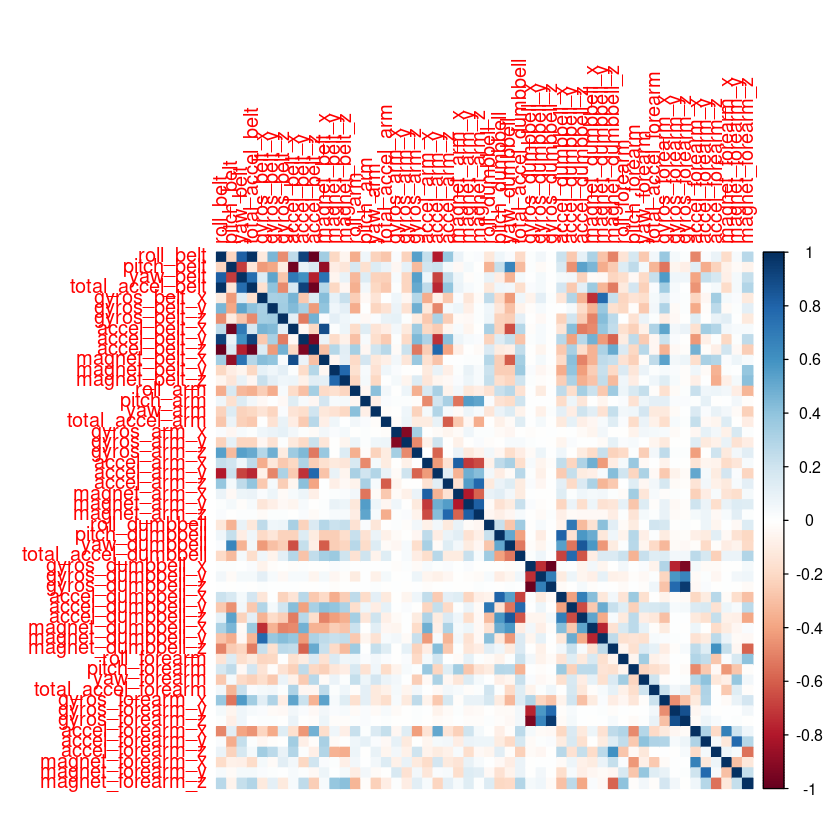

In [43]:
corrplot(corrPlot, method="color")

In [44]:
treeModel <- rpart(classe ~ ., data=trainData, method="class")

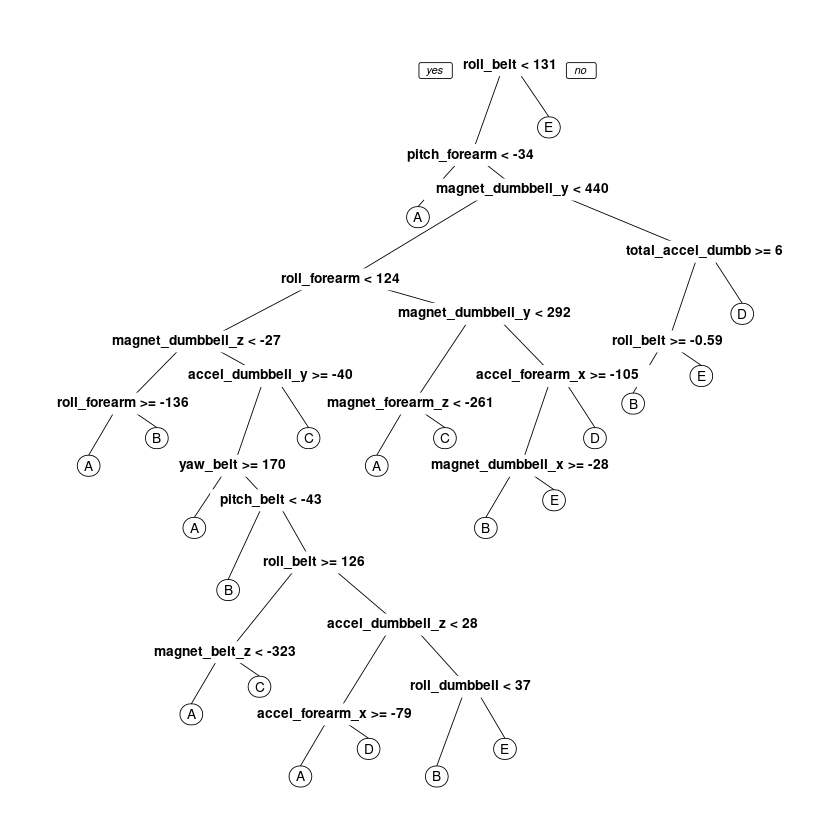

In [45]:
prp(treeModel) 